In [2]:
import numpy as np
import pandas as pd
import seaborn as se
import datetime as date
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data from loan.csv and converting to dataframe
loan_df= pd.read_csv("loan.csv")

In [4]:
#Data Cleaning: Check whether any header is available in data, if it is there delete it
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Above results shows that there are no header and footer details

In [7]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [10]:
#From above result we can consider onluy Fully paid and charged off, we can delete current because current means ongoing payment
loan_df1=loan_df[loan_df['loan_status']!='Current']
loan_df1.shape

(38577, 111)

In [11]:
# Now total records reduced to 38577 as current has been deleted
#check if there are any duplicate values
duplicates=len(loan_df1[loan_df1.duplicated()])
print(duplicates)

0


In [12]:
#There are no duplicate rows
#FInd rows with null values, unique values, values with NA
print("No.of null values ",loan_df1.isnull().sum())
print("No.of unique values ",loan_df1.nunique().sum())
print("No.of rows with NA values ",loan_df1.isna().sum())
na_columns=list(loan_df1.columns[loan_df1.isna().all()])
print("No.of NA columns",len(na_columns))
print(na_columns)

No.of null values  id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64
No.of unique values  403084
No.of rows with NA values  id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64
No.of NA columns 55
['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_jo

In [12]:
#Drop NA columns:
loan_df1=loan_df1.dropna(axis=1, how='all')
list(loan_df1.columns[loan_df1.isna().all()])
print(loan_df1)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

In [13]:
# Finding unique columns:
unique_cols= [col for col in loan_df1.columns if loan_df1[col].nunique() == len(loan_df1)]
unique_cols

['id', 'member_id', 'url']

In [14]:
#drop unique columns url and member id:
loan_df1.drop(['url','member_id'], axis=1,inplace =True)
loan_df1.shape

(38577, 109)

In [15]:
#Delete  text and description as this will not be used for EDA.In the data dictionary desc and title are text columns
loan_df1.drop(['desc','title'], axis=1,inplace =True)
loan_df1.shape

(38577, 107)

In [17]:
#Deleting behavioural data as it is not required for our analysis
loan_df1=loan_df1.drop(['application_type','last_pymnt_d','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_pymnt_amnt','out_prncp','out_prncp_inv',
                  'last_credit_pull_d','open_acc','pub_rec','total_rec_prncp','total_pymnt', 'total_pymnt_inv','total_rec_int','total_rec_int',
                  'total_rec_late_fee'],axis=1)
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#We can delete sub grade as we are not going to analyse at this level, We will analyse only grade level
loan_df1=loan_df1.drop(['sub_grade'], axis=1)

In [19]:
loan_df1.nunique().sort_values()

il_util                      0
mort_acc                     0
mo_sin_rcnt_tl               0
mo_sin_rcnt_rev_tl_op        0
mo_sin_old_rev_tl_op         0
                         ...  
funded_amnt_inv           8050
installment              15022
revol_bal                21275
emp_title                28027
id                       38577
Length: 90, dtype: int64

In [20]:
#Delete columns with value=1
for column  in loan_df1.columns:
    if loan_df1[column].nunique(dropna=True) ==1:
        print(column)
        loan_df1=loan_df1.drop(column, axis=1)
loan_df1

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
loan_df1.nunique().sort_values()

loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_

In [21]:
# find and drop columns for which >50% values are null's
null_values=len(loan_df1)
for column  in loan_df1.columns:
    if loan_df1[column].isna().mean().round(2)>=50/100:
        print(column)
        loan_df1=loan_df1.drop(column, axis=1)
loan_df1

mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,credit_card,860xx,AZ,27.65,13648,83.70%,9,0.00,0.00,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,car,309xx,GA,1.00,1687,9.40%,4,117.08,1.11,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,small_business,606xx,IL,8.72,2956,98.50%,10,0.00,0.00,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,other,917xx,CA,20.00,5598,21%,37,0.00,0.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,wedding,852xx,AZ,11.20,7963,28.30%,12,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,home_improvement,802xx,CO,11.33,7274,13.10%,40,0.00,0.00,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,credit_card,274xx,NC,6.40,8847,26.90%,9,0.00,0.00,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,debt_consolidation,017xx,MA,2.30,9698,19.40%,20,0.00,0.00,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,other,208xx,MD,3.72,85607,0.70%,26,0.00,0.00,NaN


In [27]:
loan_df1.shape

(38577, 38)

In [28]:
loan_df1.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_pymnt_inv     

In [22]:
loan_df1.drop(['emp_title'],axis=1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,...,credit_card,860xx,AZ,27.65,13648,83.70%,9,0.00,0.00,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,...,car,309xx,GA,1.00,1687,9.40%,4,117.08,1.11,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,...,small_business,606xx,IL,8.72,2956,98.50%,10,0.00,0.00,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,...,other,917xx,CA,20.00,5598,21%,37,0.00,0.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,...,wedding,852xx,AZ,11.20,7963,28.30%,12,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,...,home_improvement,802xx,CO,11.33,7274,13.10%,40,0.00,0.00,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,...,credit_card,274xx,NC,6.40,8847,26.90%,9,0.00,0.00,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,...,debt_consolidation,017xx,MA,2.30,9698,19.40%,20,0.00,0.00,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,...,other,208xx,MD,3.72,85607,0.70%,26,0.00,0.00,NaN


In [23]:
#check data type of term
loan_df1['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [24]:
#Convert term to int
def term_dtype(term):
    return int(term.strip().split()[0])

In [25]:
loan_df1['term']=loan_df1['term'].apply(term_dtype)
loan_df1['term'].dtype

dtype('int64')

In [ ]:
# Convert int_rate fromns tring to float.
loan_df1['int_rate']=loan_df1['int_rate'].str.strip('%').astype(float)

In [53]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38527 non-null  int64  
 1   loan_amnt                38527 non-null  float64
 2   funded_amnt              38527 non-null  float64
 3   funded_amnt_inv          38527 non-null  float64
 4   term                     38527 non-null  int64  
 5   int_rate                 38527 non-null  float64
 6   installment              38527 non-null  float64
 7   grade                    38527 non-null  object 
 8   emp_title                36145 non-null  object 
 9   emp_length               38527 non-null  object 
 10  home_ownership           38527 non-null  object 
 11  annual_inc               38527 non-null  float64
 12  verification_status      38527 non-null  object 
 13  issue_d                  38527 non-null  object 
 14  loan_status              38

In [54]:
print("Mode : " + loan_df1.emp_length.mode()[0])
loan_df1.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

In [55]:
loan_df1.emp_length.fillna(loan_df1.emp_length.mode()[0], inplace = True)
loan_df1.emp_length.isna().sum()

0

In [56]:
#Drop revol_util
loan_df1.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df1.revol_util.isna().sum()

0

In [57]:
loan_df1['int_rate'].dtypes

dtype('float64')

In [58]:
loan_df1['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: count, Length: 370, dtype: int64

In [59]:
#Convert column loan_amount and fund_amount to float from string
loan_df1= loan_df1.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10+ years,...,credit_card,860xx,AZ,27.65,13648,83.70%,9,0.00,0.00,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,< 1 year,...,car,309xx,GA,1.00,1687,9.40%,4,117.08,1.11,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10+ years,...,small_business,606xx,IL,8.72,2956,98.50%,10,0.00,0.00,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,...,other,917xx,CA,20.00,5598,21%,37,0.00,0.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3 years,...,wedding,852xx,AZ,11.20,7963,28.30%,12,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,FiSite Research,4 years,...,home_improvement,802xx,CO,11.33,7274,13.10%,40,0.00,0.00,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,credit_card,274xx,NC,6.40,8847,26.90%,9,0.00,0.00,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,NaN,< 1 year,...,debt_consolidation,017xx,MA,2.30,9698,19.40%,20,0.00,0.00,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,NaN,< 1 year,...,other,208xx,MD,3.72,85607,0.70%,26,0.00,0.00,NaN


In [60]:
#Check Grade type:
loan_df1['grade'].value_counts()

grade
B    11674
A    10045
C     7820
D     5069
E     2652
F      970
G      297
Name: count, dtype: int64

In [61]:
#check emp_length type
loan_df1['emp_length'].value_counts()

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

In [62]:
loan_df1.dtypes

id                           int64
loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
revol_bal                    int64
revol_util                  object
total_acc                    int64
recoveries                 float64
collection_recovery_fee    float64
pub_rec_bankruptcies       float64
dtype: object

In [63]:
#Round off loan_amount, fund_amount, fund_amount_inv, int_rate, dti to 2 decimal points
for column in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df1[column] = loan_df1[column].apply(lambda x: round(x,2))
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10+ years,...,credit_card,860xx,AZ,27.65,13648,83.70%,9,0.00,0.00,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,< 1 year,...,car,309xx,GA,1.00,1687,9.40%,4,117.08,1.11,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10+ years,...,small_business,606xx,IL,8.72,2956,98.50%,10,0.00,0.00,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,...,other,917xx,CA,20.00,5598,21%,37,0.00,0.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3 years,...,wedding,852xx,AZ,11.20,7963,28.30%,12,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,FiSite Research,4 years,...,home_improvement,802xx,CO,11.33,7274,13.10%,40,0.00,0.00,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,credit_card,274xx,NC,6.40,8847,26.90%,9,0.00,0.00,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,NaN,< 1 year,...,debt_consolidation,017xx,MA,2.30,9698,19.40%,20,0.00,0.00,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,NaN,< 1 year,...,other,208xx,MD,3.72,85607,0.70%,26,0.00,0.00,NaN


In [64]:
#issue_d
loan_df1['issue_d'].value_counts()

issue_d
Nov-11    2060
Dec-11    2042
Oct-11    1940
Sep-11    1913
Aug-11    1798
Jul-11    1742
Jun-11    1727
May-11    1609
Apr-11    1559
Mar-11    1440
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1128
Nov-10    1121
Jul-10    1118
Sep-10    1085
Aug-10    1075
Jun-10    1024
May-10     920
Apr-10     827
Mar-10     736
Feb-10     626
Nov-09     601
Dec-09     596
Jan-10     587
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [65]:
loan_df1['issue_d'] = pd.to_datetime(loan_df1.issue_d, format='%b-%y')
loan_df1['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38527, dtype: datetime64[ns]

In [66]:
(loan_df1.isnull().sum()*100)/len(loan_df1)

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_title                  6.182677
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
pub_rec_bankruptcies       1.809121
dtype: float64

In [67]:
#remove behavioural columns:
loan_df1=loan_df1.drop(['revol_bal','revol_util','total_acc'],axis=1)

In [68]:
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10+ years,...,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.00,0.00,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,< 1 year,...,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,117.08,1.11,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10+ years,...,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.00,0.00,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.00,0.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3 years,...,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,FiSite Research,4 years,...,Not Verified,2007-07-01,Fully Paid,home_improvement,802xx,CO,11.33,0.00,0.00,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,2007-07-01,Fully Paid,credit_card,274xx,NC,6.40,0.00,0.00,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,NaN,< 1 year,...,Not Verified,2007-07-01,Fully Paid,debt_consolidation,017xx,MA,2.30,0.00,0.00,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,NaN,< 1 year,...,Not Verified,2007-07-01,Fully Paid,other,208xx,MD,3.72,0.00,0.00,NaN


In [69]:
(loan_df1.isnull().sum()*100)/len(loan_df1)

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_title                  6.182677
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
pub_rec_bankruptcies       1.809121
dtype: float64

In [72]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
loan_prev=len(loan_df1)
loan_prev

37830

In [73]:
loan_df1= loan_df1[loan_df1['emp_length'].notna()]
loan_df1= loan_df1[loan_df1['pub_rec_bankruptcies'].notna()]

In [74]:
loan_after=len(loan_df1)
total_deleted=((loan_prev-loan_after)*100)/loan_prev
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 0.0
(39717, 111)


In [75]:
#Check if there are any na rows
(loan_df.isnull().sum()*100)/len(loan_df) 

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [76]:
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10+ years,...,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.00,0.00,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,< 1 year,...,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,117.08,1.11,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10+ years,...,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.00,0.00,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.00,0.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3 years,...,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800.0,4800.0,1100.0,36,10.28,155.52,C,E.E. Wine Inc,1 year,...,Not Verified,2007-11-01,Fully Paid,debt_consolidation,226xx,VA,7.51,0.00,0.00,1.0
39573,150940,7000.0,7000.0,1000.0,36,10.59,227.82,C,NaN,3 years,...,Not Verified,2007-11-01,Fully Paid,debt_consolidation,853xx,AZ,8.50,0.00,0.00,1.0
39623,132892,9000.0,9000.0,700.0,36,12.49,301.04,D,Maximus,8 years,...,Not Verified,2007-10-01,Charged Off,debt_consolidation,207xx,MD,5.08,1909.87,668.36,1.0
39666,119043,15450.0,15450.0,600.0,36,11.22,507.46,C,ARIN,2 years,...,Not Verified,2007-08-01,Charged Off,debt_consolidation,201xx,VA,13.50,304.20,3.09,1.0


In [77]:
# Create dervied columns for issue month and issue year from issues date
loan_df1['issue_year']=pd.DatetimeIndex(loan_df1['issue_d']).year
loan_df1['issue_month']=pd.DatetimeIndex(loan_df1['issue_d']).month

<Axes: >

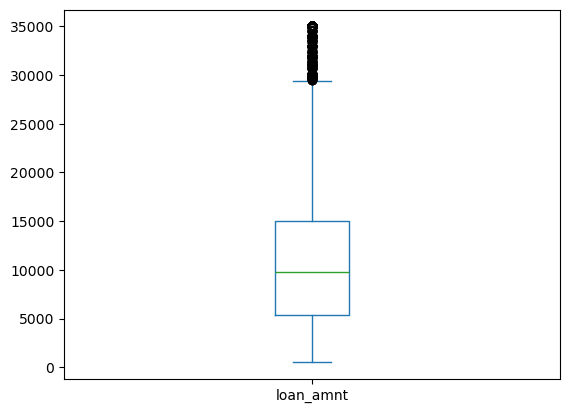

In [78]:
loan_df1['loan_amnt'].plot(kind='box')

In [80]:
#Bucketing for better analysis:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df1['loan_amnt_b'] = loan_df1.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [81]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df1['annual_inc_b'] = loan_df1.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [82]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df1['int_rate_b'] = loan_df1.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [86]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df1['dti_b'] = loan_df1.apply(lambda x : bucket_dti(x.dti), axis = 1)

<Axes: >

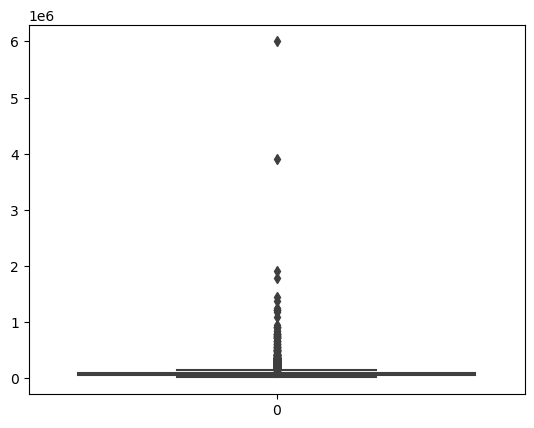

In [83]:
se.boxplot(loan_df1['annual_inc'])

In [90]:
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10,...,Jan-15,171.62,May-16,0.0,2011,12,0 - 5K,0 - 40k,Low,Very High
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,0,...,Apr-13,119.66,Sep-13,0.0,2011,12,0 - 5K,0 - 40k,Very High,Very Low
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10,...,Jun-14,649.91,May-16,0.0,2011,12,0 - 5K,0 - 40k,Very High,Low
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10,...,Jan-15,357.48,Apr-16,0.0,2011,12,5K - 10K,40k - 50k,High,High
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3,...,Jan-15,161.03,Jan-16,0.0,2011,12,0 - 5K,0 - 40k,Very Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800.0,4800.0,1100.0,36,10.28,155.52,C,E.E. Wine Inc,1,...,Aug-08,3891.08,Aug-08,1.0,2007,11,0 - 5K,0 - 40k,Low,Very Low
39573,150940,7000.0,7000.0,1000.0,36,10.59,227.82,C,NaN,3,...,May-10,1571.29,Apr-16,1.0,2007,11,5K - 10K,60k to 70k,Low,Low
39623,132892,9000.0,9000.0,700.0,36,12.49,301.04,D,Maximus,8,...,May-08,301.05,May-16,1.0,2007,10,5K - 10K,0 - 40k,Moderate,Very Low
39666,119043,15450.0,15450.0,600.0,36,11.22,507.46,C,ARIN,2,...,Oct-09,1016.15,Mar-10,1.0,2007,8,15K - above,0 - 40k,Moderate,Moderate


In [84]:
quantile_info = loan_df1.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [85]:
per_95_annual_inc = loan_df1['annual_inc'].quantile(0.95)
loan_df1 = loan_df1[loan_df1.annual_inc <= per_95_annual_inc]

<Axes: >

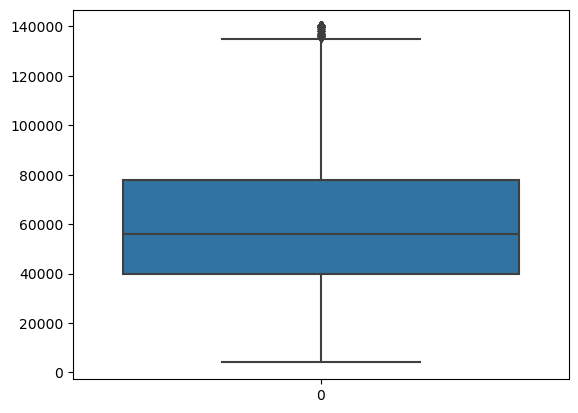

In [86]:
se.boxplot(loan_df1.annual_inc)

<Axes: >

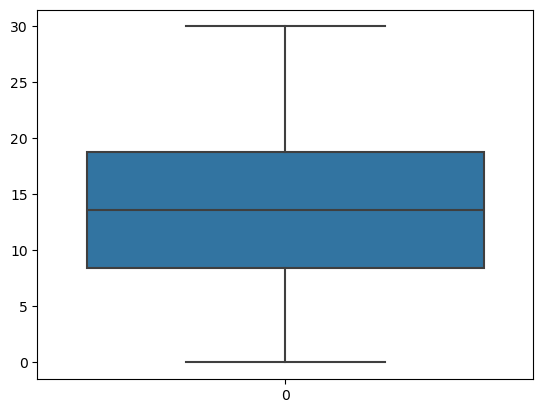

In [87]:
se.boxplot(loan_df1.dti)

<Axes: >

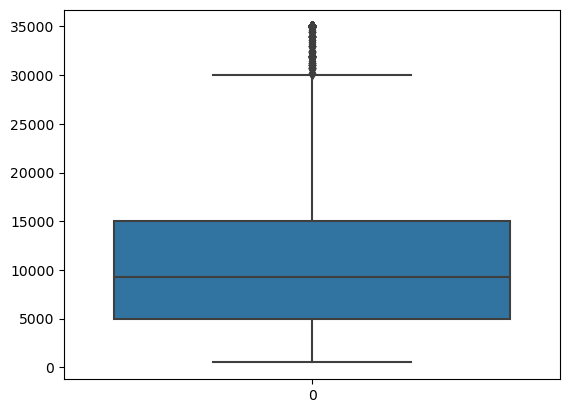

In [88]:
se.boxplot(loan_df1.loan_amnt)

In [89]:

loan_df1.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25975.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

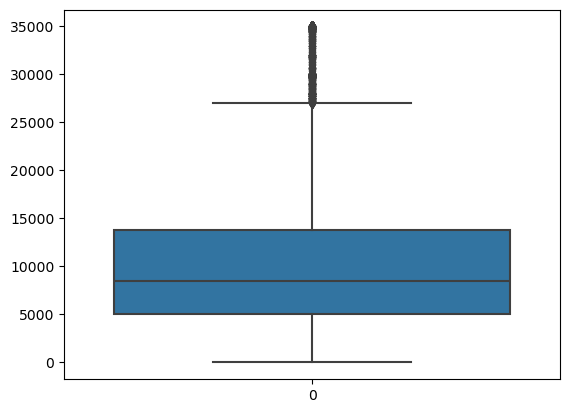

In [90]:
se.boxplot(loan_df1.funded_amnt_inv)

In [91]:

loan_df1.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.0
0.750    13800.0
0.900    19800.0
0.950    23975.0
0.970    24975.0
0.975    25600.0
0.980    27975.0
0.985    29950.0
0.990    32000.0
1.000    35000.0
Name: funded_amnt_inv, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

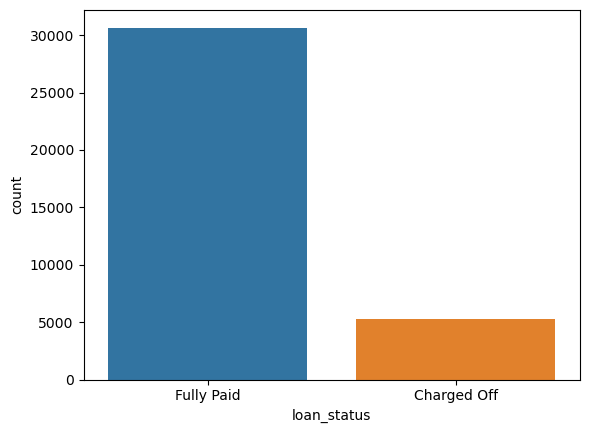

In [93]:
se.countplot(x = 'loan_status', data = loan_df1)

<Axes: xlabel='grade', ylabel='count'>

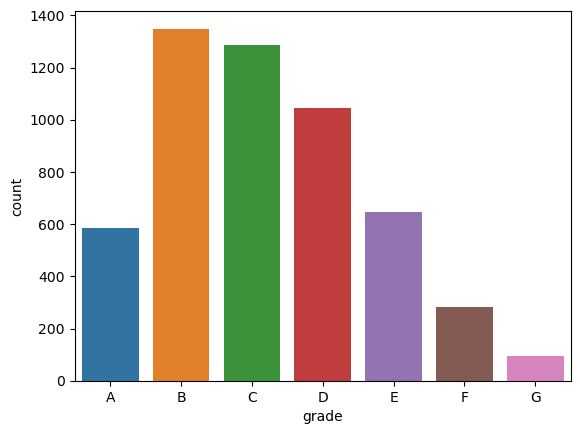

In [94]:
se.countplot(x = 'grade', data = loan_df1[loan_df1.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [105]:
#analyzing home owner ship: Check for unique values
loan_df1['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

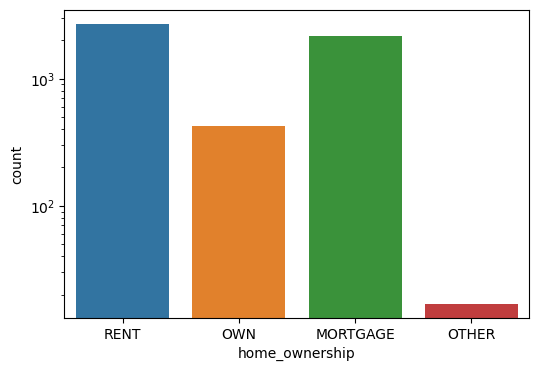

In [107]:
fig, ax = plot.subplots(figsize = (6,4))
ax.set(yscale = 'log')
se.countplot(x='home_ownership', data=loan_df1[loan_df1['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

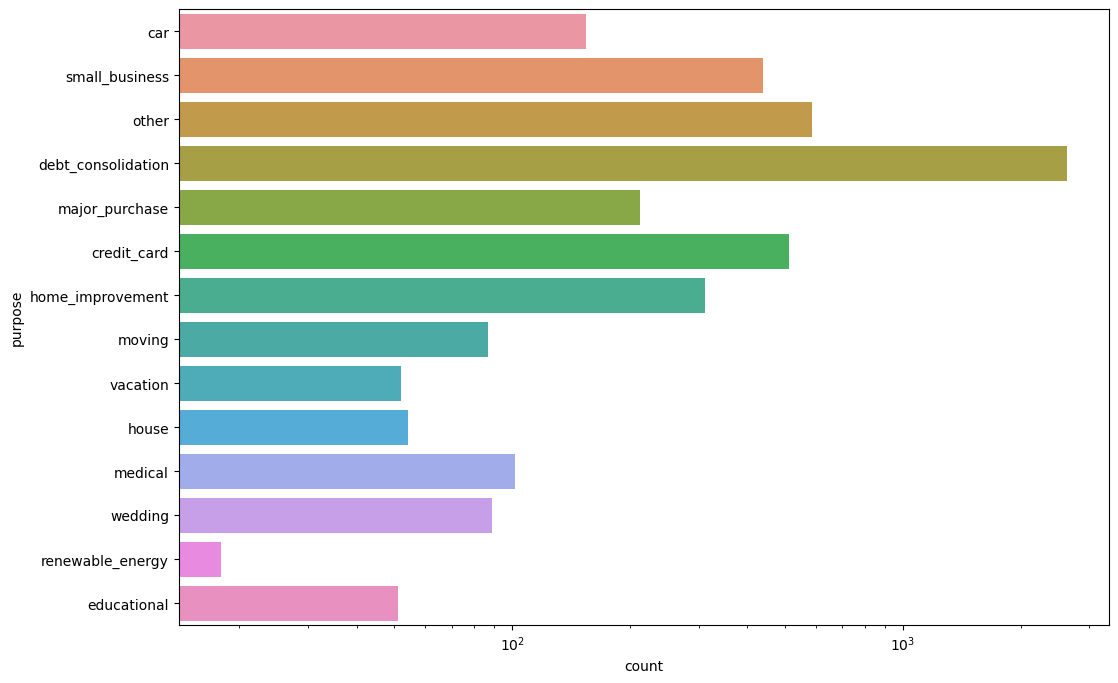

In [108]:
fig, ax = plot.subplots(figsize = (12,8))
ax.set(xscale = 'log')
se.countplot(y ='purpose', data=loan_df1[loan_df1.loan_status == 'Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

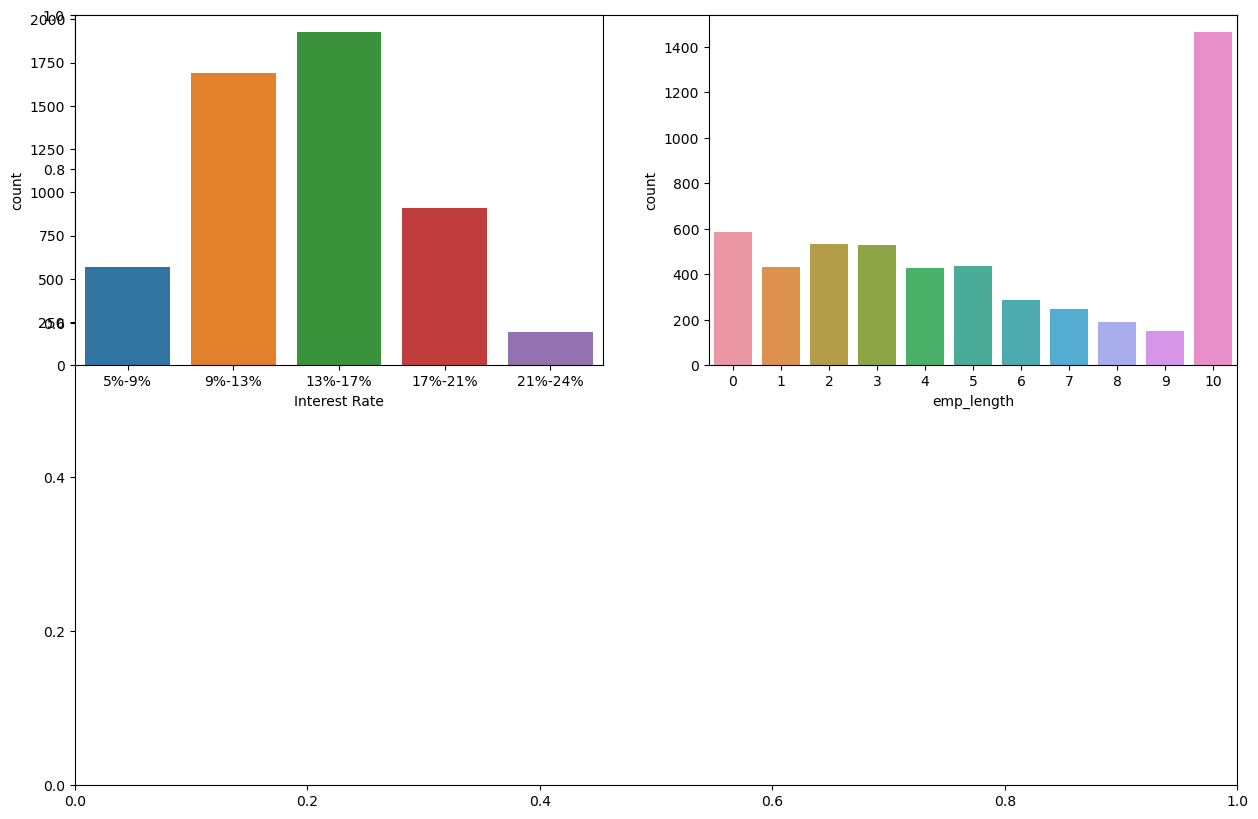

In [118]:
fig, ax = plot.subplots(figsize = (15,10))
plot.subplot(221)
se.countplot(x='int_rate_groups', data=loan_df1[loan_df1.loan_status == 'Charged Off'])
plot.xlabel('Interest Rate')
plot.subplot(222)
se.countplot(x='emp_length', data=loan_df1[loan_df1.loan_status == 'Charged Off'])

In [111]:
loan_df1['int_rate'],

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 35948, dtype: float64

In [113]:
loan_df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b,int_rate_groups,open_acc_groups
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10,...,May-16,0.0,2011,12,0 - 5K,0 - 40k,Low,Very High,9%-13%,2-10
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,0,...,Sep-13,0.0,2011,12,0 - 5K,0 - 40k,Very High,Very Low,13%-17%,2-10
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10,...,May-16,0.0,2011,12,0 - 5K,0 - 40k,Very High,Low,13%-17%,2-10
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10,...,Apr-16,0.0,2011,12,5K - 10K,40k - 50k,High,High,13%-17%,2-10
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3,...,Jan-16,0.0,2011,12,0 - 5K,0 - 40k,Very Low,Low,5%-9%,2-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800.0,4800.0,1100.0,36,10.28,155.52,C,E.E. Wine Inc,1,...,Aug-08,1.0,2007,11,0 - 5K,0 - 40k,Low,Very Low,9%-13%,10-19
39573,150940,7000.0,7000.0,1000.0,36,10.59,227.82,C,NaN,3,...,Apr-16,1.0,2007,11,5K - 10K,60k to 70k,Low,Low,9%-13%,2-10
39623,132892,9000.0,9000.0,700.0,36,12.49,301.04,D,Maximus,8,...,May-16,1.0,2007,10,5K - 10K,0 - 40k,Moderate,Very Low,9%-13%,2-10
39666,119043,15450.0,15450.0,600.0,36,11.22,507.46,C,ARIN,2,...,Mar-10,1.0,2007,8,15K - above,0 - 40k,Moderate,Moderate,9%-13%,10-19


<Axes: xlabel='open_acc_groups', ylabel='count'>

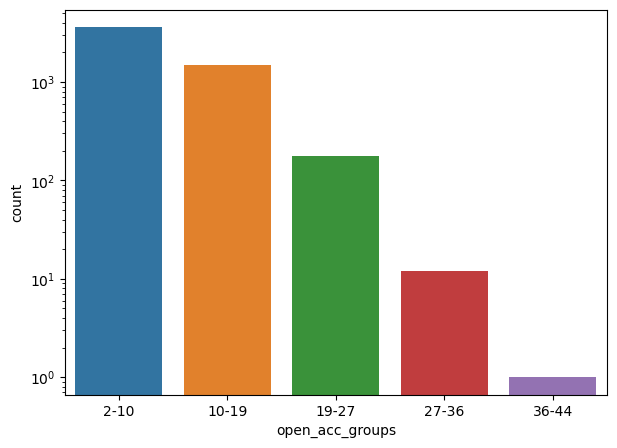

In [119]:
fig, ax = plot.subplots(figsize = (7,5))
ax.set_yscale('log')
se.countplot(x='open_acc_groups', data=loan_df1[loan_df1.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

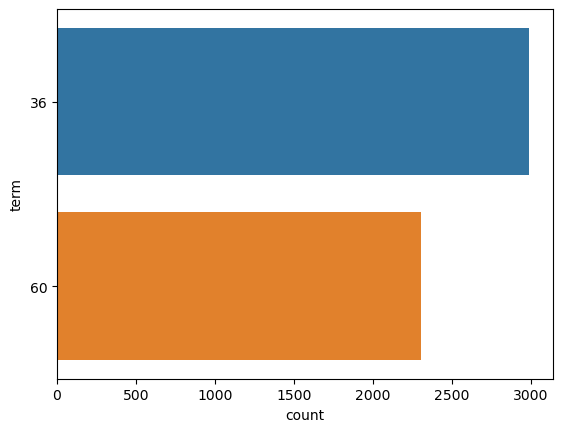

In [121]:
se.countplot(y='term', data=loan_df1[loan_df1['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

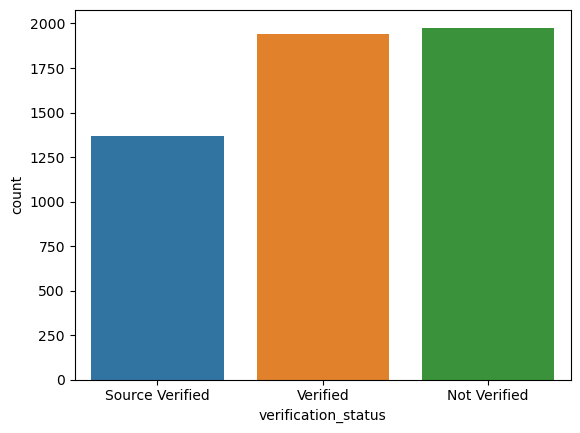

In [122]:
se.countplot(x='verification_status', data=loan_df1[loan_df1['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

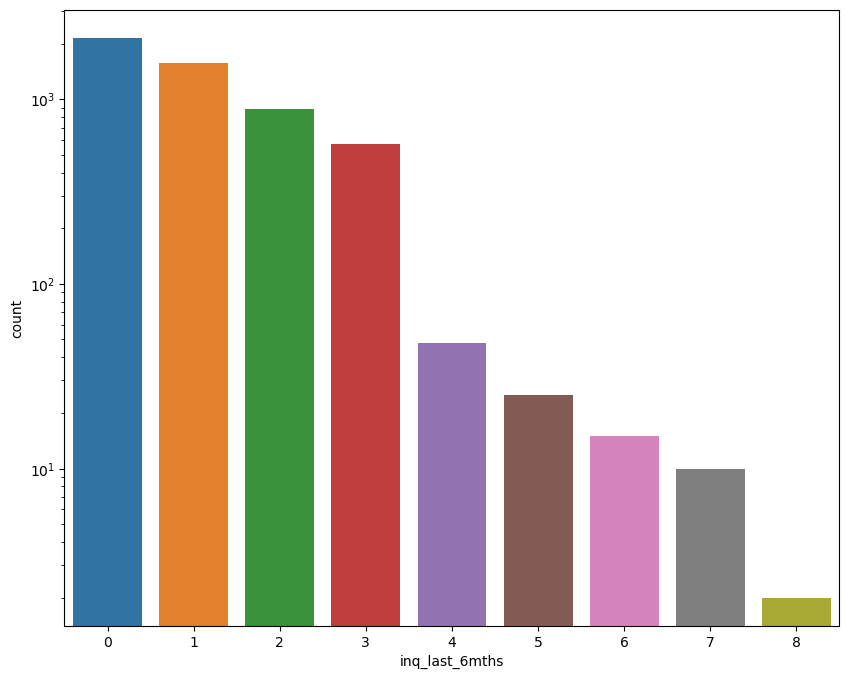

In [123]:
fig,ax = plot.subplots(figsize = (10,8))
ax.set_yscale('log')
se.countplot(x='inq_last_6mths', data=loan_df1[loan_df1['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

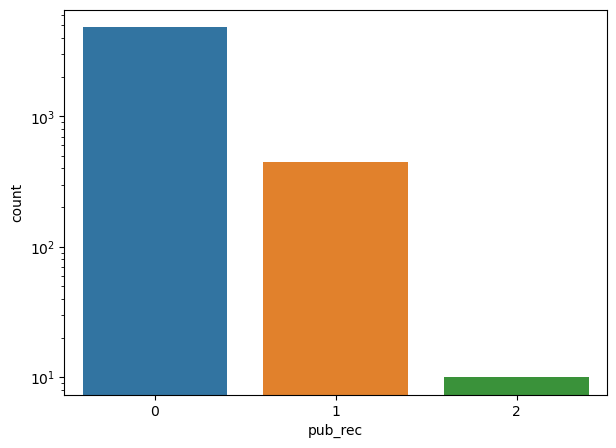

In [125]:
fig,ax = plot.subplots(figsize = (7,5))
ax.set_yscale('log')
se.countplot(x='pub_rec', data=loan_df1[loan_df1['loan_status']=='Charged Off'])

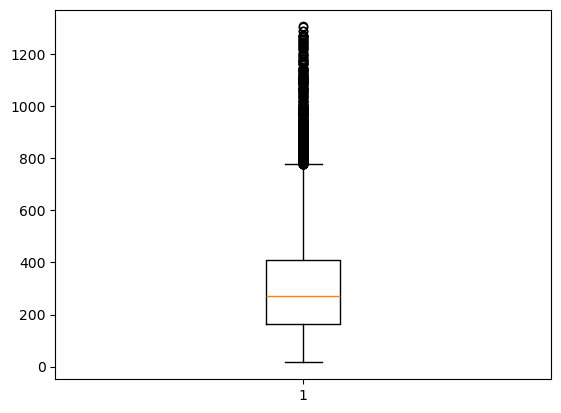

In [129]:
plot.boxplot(loan_df1['installment'])
plot.show()

In [127]:
loan_df1['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 35948, dtype: datetime64[ns]

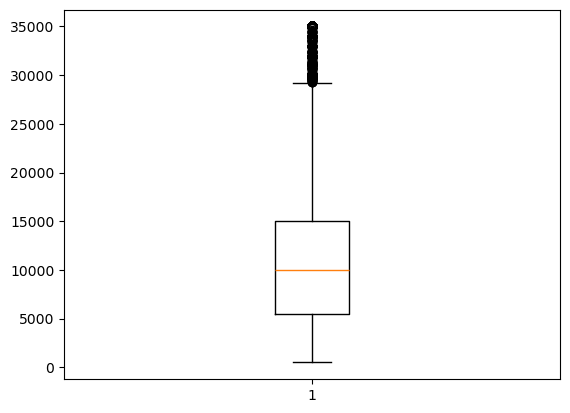

In [131]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

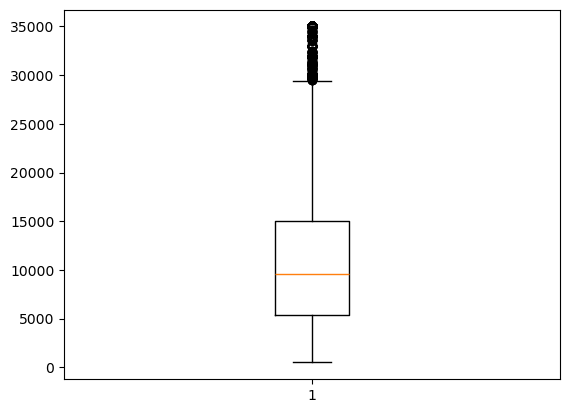

In [132]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

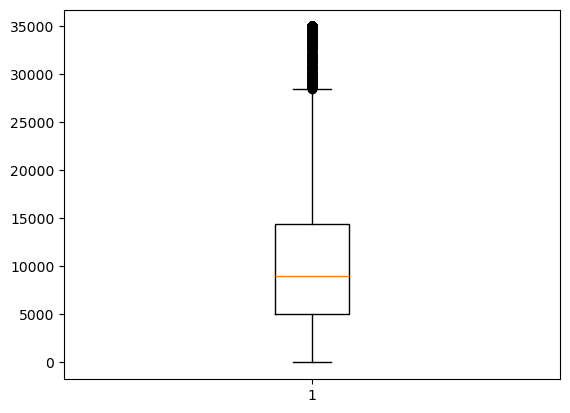

In [133]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

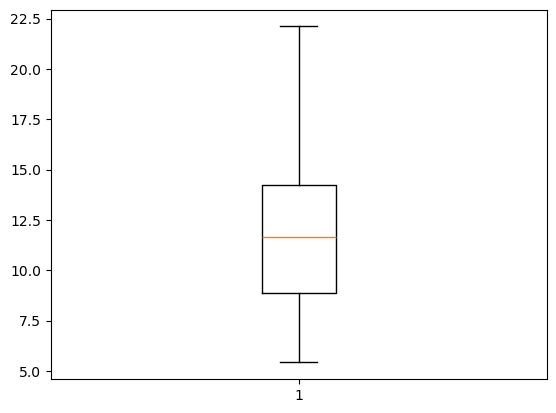

In [135]:
plot.boxplot(loan_df1['int_rate'])
plot.show()

In [104]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [105]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df1 =remove_outliers_iqr(loan_df1, outliers_columns_set1,1.5)
loan_df1 =remove_outliers_iqr(loan_df1, outliers_columns_set2,1.5)

In [138]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    se.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    se.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

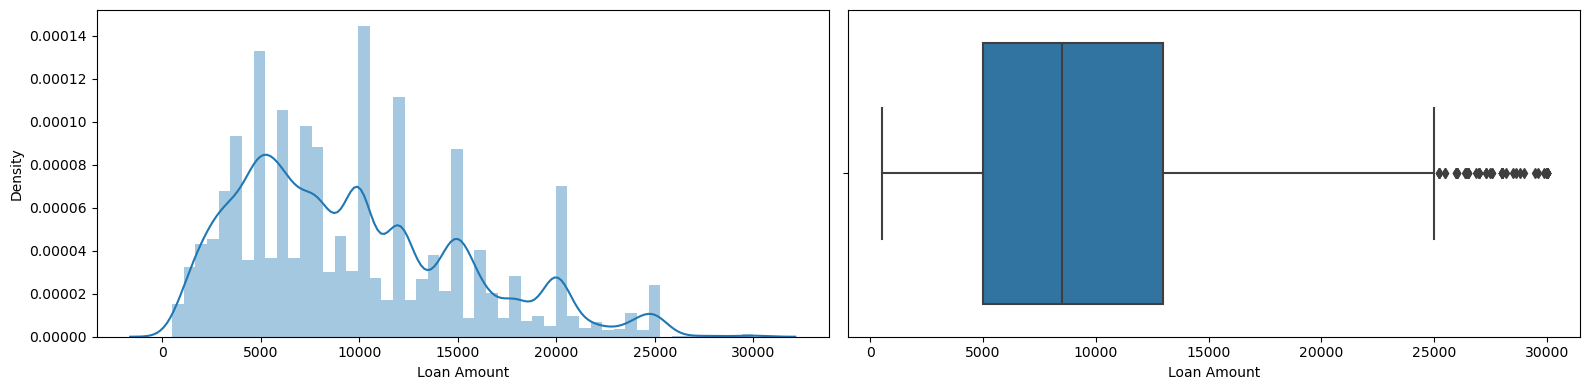

count    33351.000000
mean      9631.427843
std       5705.114033
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

In [141]:
plot_digram(loan_df1, 'loan_amnt')
#Describe loan amount
loan_df1['loan_amnt'].describe()

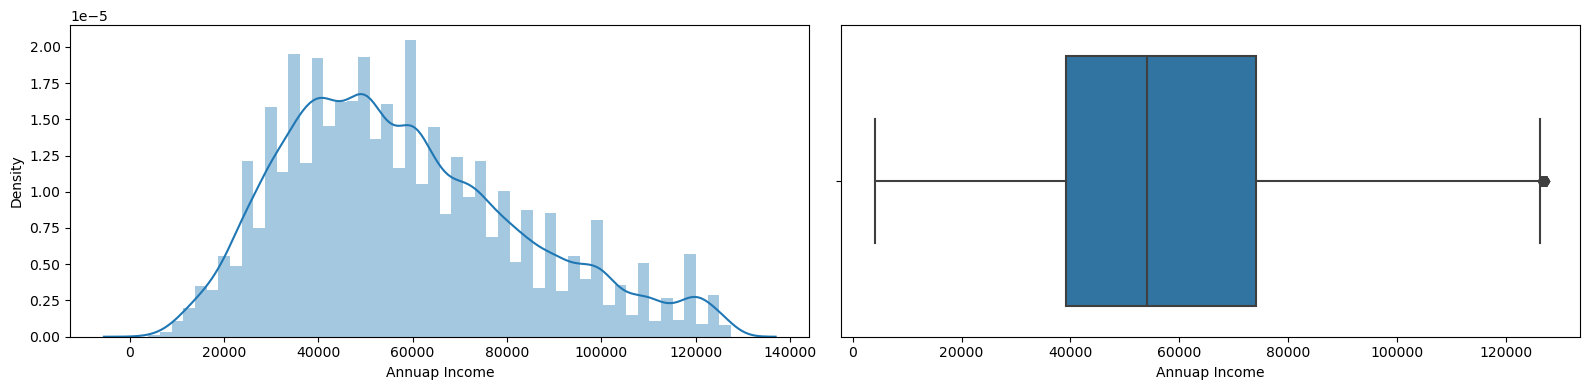

count     33351.000000
mean      57983.833571
std       25303.706087
min        4000.000000
25%       39150.000000
50%       54000.000000
75%       74088.000000
max      127500.000000
Name: annual_inc, dtype: float64

In [142]:
plot_digram(loan_df1, 'annual_inc')
loan_df1['annual_inc'].describe()

In [143]:
# The Annual income of most of the applicants lies between 40k-75k.
print("Average annual Income is :", round(loan_df1['annual_inc'].mean(),0))

Average annual Income is : 57984.0


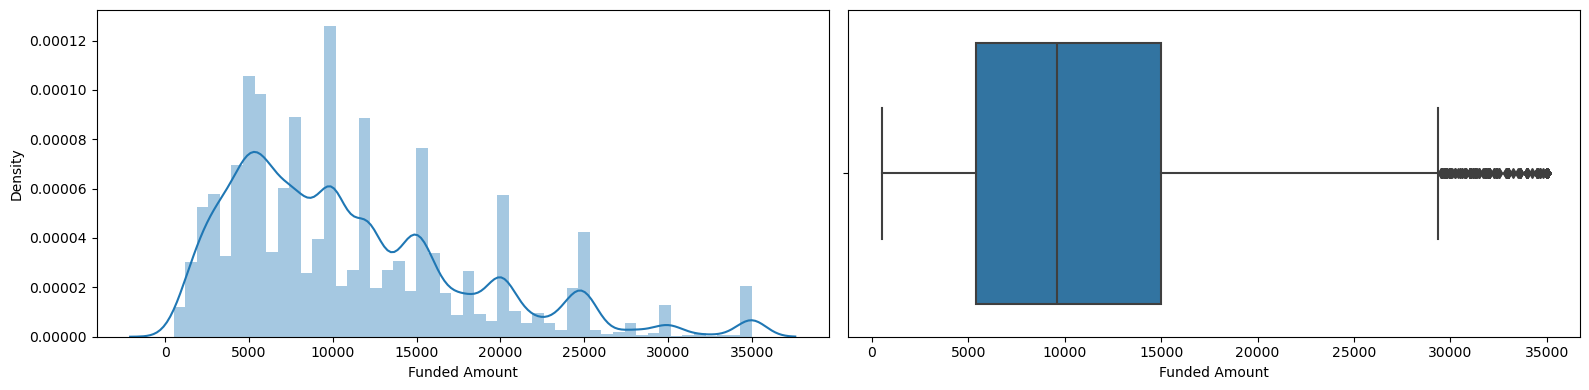

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [144]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

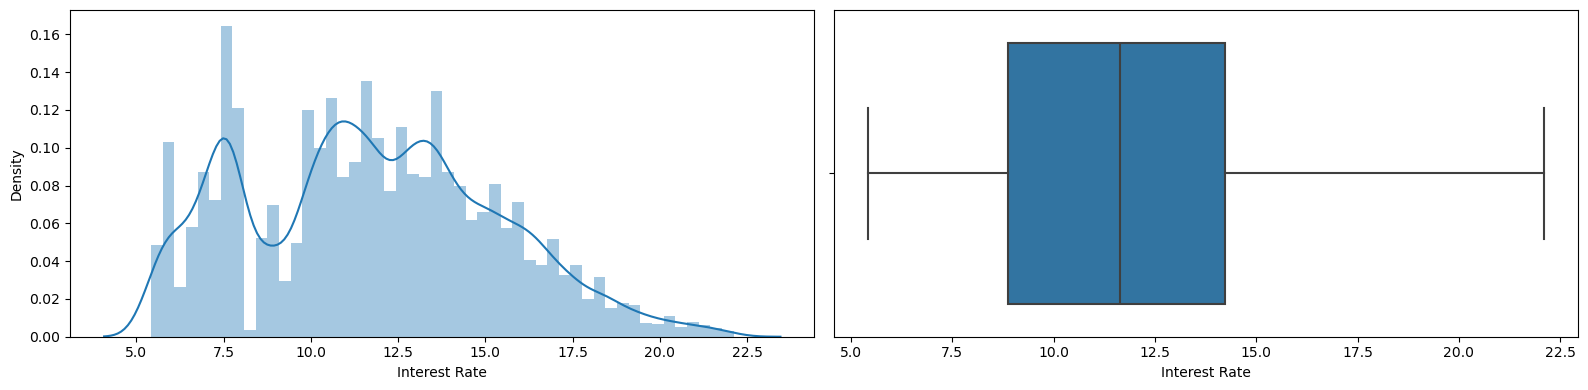

count    33351.000000
mean        11.727310
std          3.586785
min          5.420000
25%          8.880000
50%         11.630000
75%         14.220000
max         22.110000
Name: int_rate, dtype: float64

In [145]:
plot_digram(loan_df1, 'int_rate')
loan_df1['int_rate'].describe()

<Axes: xlabel='home_ownership'>

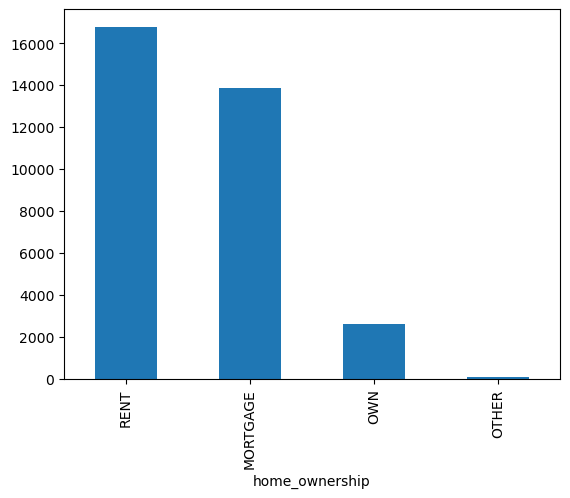

In [146]:
loan_df1['home_ownership'].value_counts().plot.bar() #Below plot shows that majority of applicants lives on rented or mortgage

<Axes: xlabel='purpose'>

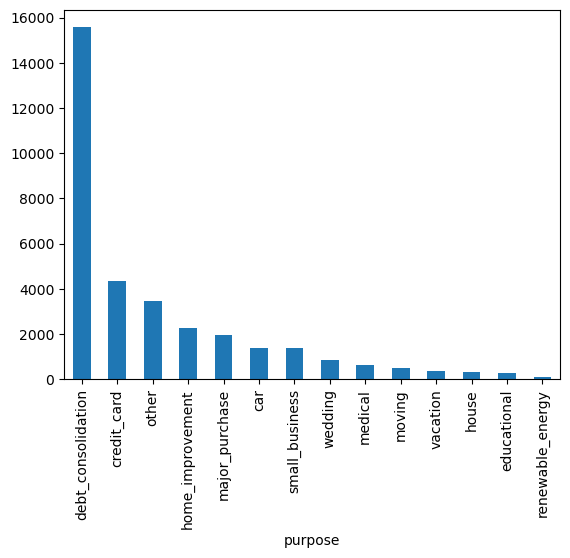

In [147]:
loan_df1['purpose'].value_counts().plot.bar()

In [148]:
loan_df1["loan_status"].value_counts()

loan_status
Fully Paid     28524
Charged Off     4827
Name: count, dtype: int64

<Axes: ylabel='count'>

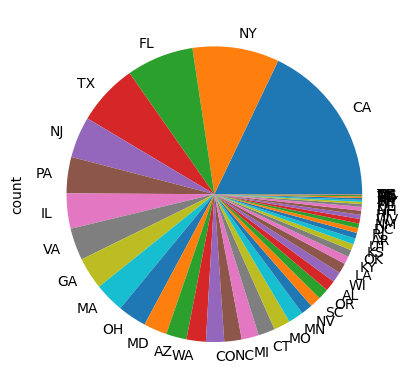

In [149]:
#using Pie plot to visualize the applicants state-Most of them are from CA state
loan_df1['addr_state'].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

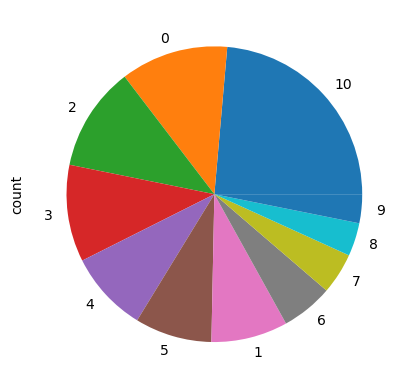

In [150]:
#Visualize experience of applicants-Most the applicants are having 10+ yrs of Exp.
loan_df1['emp_length'].value_counts().plot(kind="pie")

In [97]:
#Bivariate Analysis on annual income against Chargedoff_Proportion 
inc_range_vs_loan = loan_df1.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1705,7734,9439,0.180634
2,50k to 60k,854,4634,5488,0.155612
1,40k - 50k,847,4744,5591,0.151493
3,60k to 70k,543,3484,4027,0.134840
4,70k to 80k,451,3011,3462,0.130272
5,80k - above,890,7051,7941,0.112077


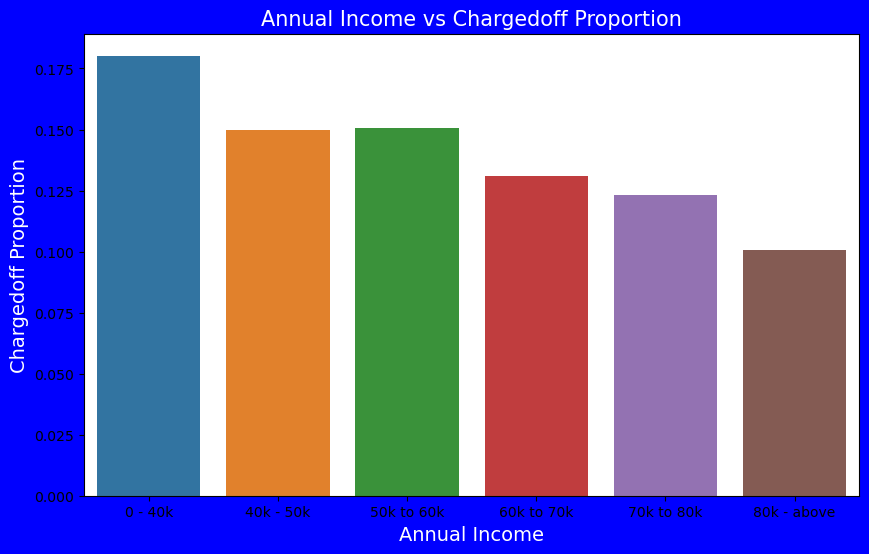

In [176]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better:
fig, ax1 = plot.subplots(figsize=(10,6),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=se.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()

In [99]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -
interest_loan = loan_df1.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_loan['Total'] = interest_loan['Charged Off']+ interest_loan['Fully Paid']
interest_loan['Chargedoff_Proportion'] = interest_loan['Charged Off'] / interest_loan['Total']
interest_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1959,5447,7406,0.264515
0,High,1069,5133,6202,0.172364
2,Moderate,1054,6034,7088,0.148702
1,Low,639,5342,5981,0.106838
4,Very Low,569,8702,9271,0.061374


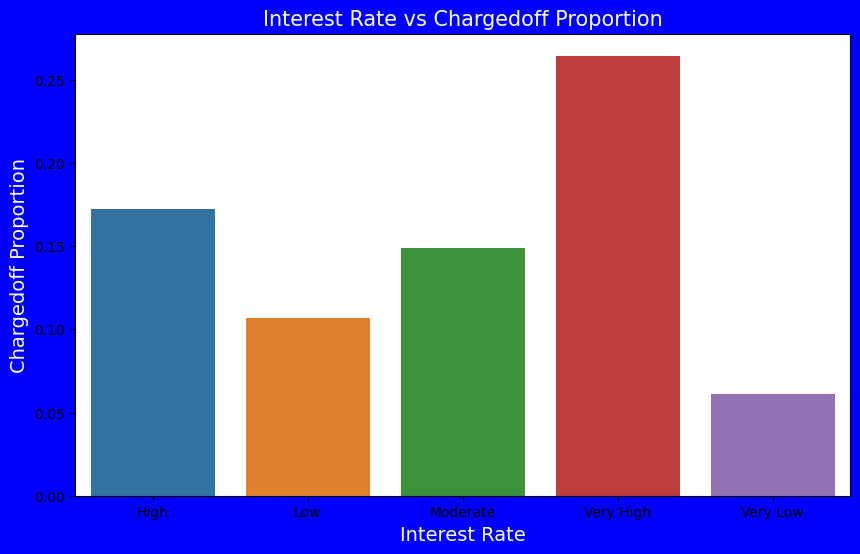

In [100]:
## plot the diagram.
fig, axis = plot.subplots(figsize=(10,6),facecolor='b')
axis.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
axis=se.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_loan)
axis.set_xlabel('Interest Rate',fontsize=14,color='w')
axis.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [101]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -
home_ownership_vs_loan = loan_df1.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,17,74,91,0.186813
3,RENT,2704,14924,17628,0.153392
2,OWN,420,2366,2786,0.150754
0,MORTGAGE,2149,13294,15443,0.139157


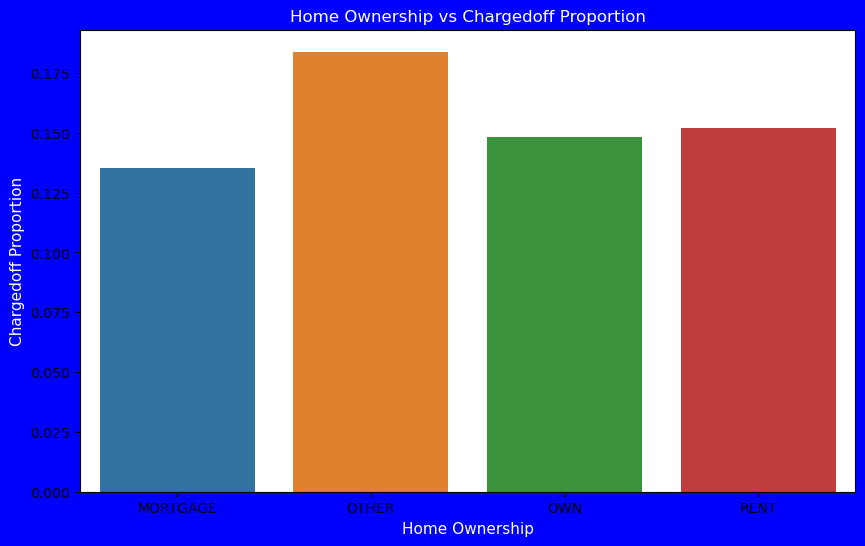

In [174]:
fig, ax1 = plot.subplots(figsize=(10, 6),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=12,color='w')
ax1=se.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=11,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=11,color = 'w')
plot.show()

In [102]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -
purpose_vs_loan = loan_df1.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,438,1136,1574,0.278272
10,renewable_energy,18,77,95,0.189474
3,educational,51,240,291,0.175258
9,other,587,2998,3585,0.163738
5,house,54,280,334,0.161677
8,moving,87,452,539,0.161410
7,medical,102,531,633,0.161137
2,debt_consolidation,2622,14387,17009,0.154154
12,vacation,52,306,358,0.145251
4,home_improvement,311,2203,2514,0.123707


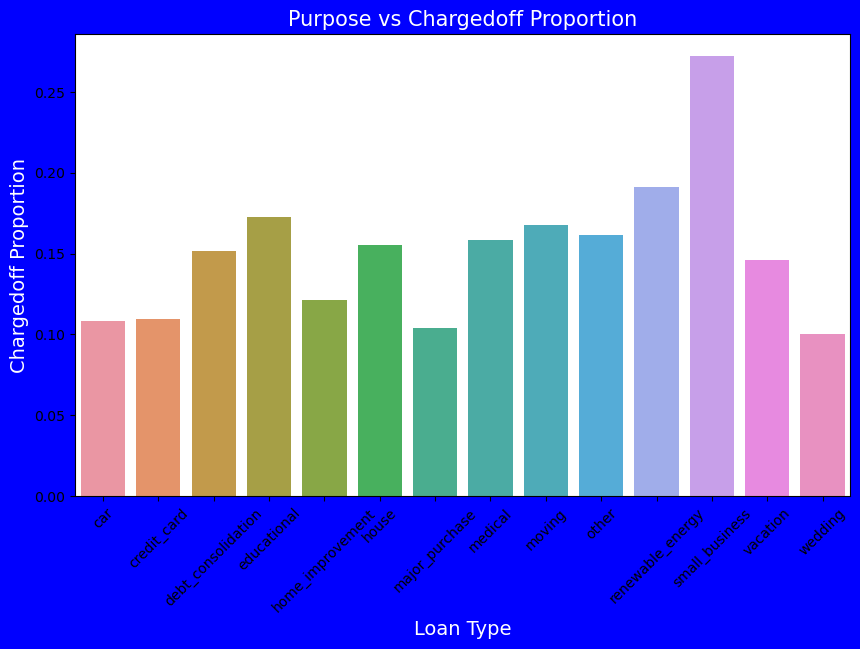

In [173]:
fig, ax1 = plot.subplots(figsize=(10, 6),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Loan Type',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [107]:
# DTI Vs Chargedoff -
dti_vs_loan = loan_df1.groupby(['dti', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2718,28.04,1.0,0.0,1.0,1.0
2756,28.63,1.0,0.0,1.0,1.0
2673,27.45,2.0,0.0,2.0,1.0
2566,25.91,1.0,0.0,1.0,1.0
2565,25.90,1.0,0.0,1.0,1.0
...,...,...,...,...,...
373,3.75,0.0,9.0,9.0,0.0
372,3.74,0.0,7.0,7.0,0.0
369,3.71,0.0,7.0,7.0,0.0
368,3.70,0.0,8.0,8.0,0.0


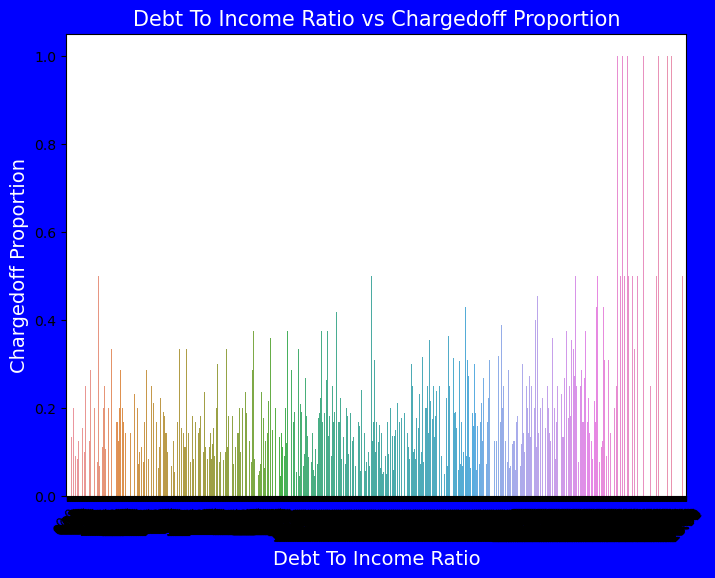

In [111]:
fig, ax1 = plot.subplots(figsize=(8,6),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='dti', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [167]:
#No.of public records bankruptcies
loan_df1['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31822
1.0     1524
2.0        5
Name: count, dtype: int64

In [168]:
 #Bankruptcies Record Vs Chargedoff
pub_rec_bankruptcies_vs_loan = loan_df1.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,337,1187,1524,0.221129
0,0.0,4488,27334,31822,0.141035


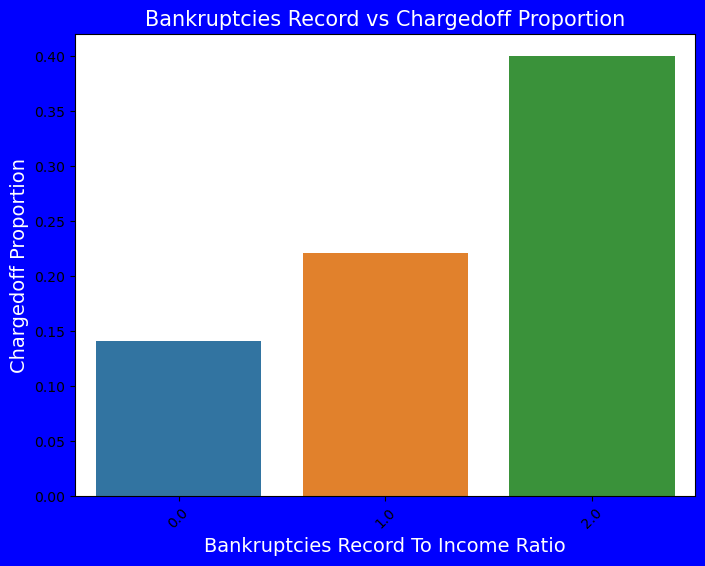

In [170]:
# graph
fig, ax1 = plot.subplots(figsize=(8, 6),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [177]:
 # Issues of Year  Vs Chargedoff_Proportion -
issue_year_vs_loan = loan_df1.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,2,5,7,0.285714
4,2011,2789,14915,17704,0.157535
1,2008,152,860,1012,0.150198
3,2010,1358,9031,10389,0.130715
2,2009,526,3713,4239,0.124086


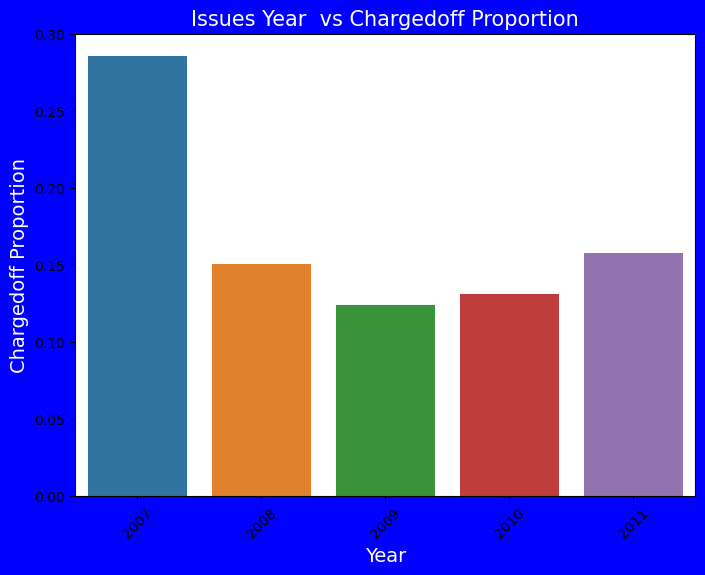

In [178]:
# graph
fig, ax1 = plot.subplots(figsize=(8, 6),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [179]:
#Month of Issue of loan Record Vs Chargedoff
issue_month_vs_loan = loan_df1.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
8,9,491,2537,3028,0.162153
11,12,576,3014,3590,0.160446
4,5,414,2195,2609,0.158681
5,6,422,2397,2819,0.149698
9,10,474,2709,3183,0.148916
10,11,511,2978,3489,0.146460
6,7,425,2565,2990,0.142140
7,8,410,2540,2950,0.138983
0,1,265,1716,1981,0.133771
3,4,319,2187,2506,0.127294


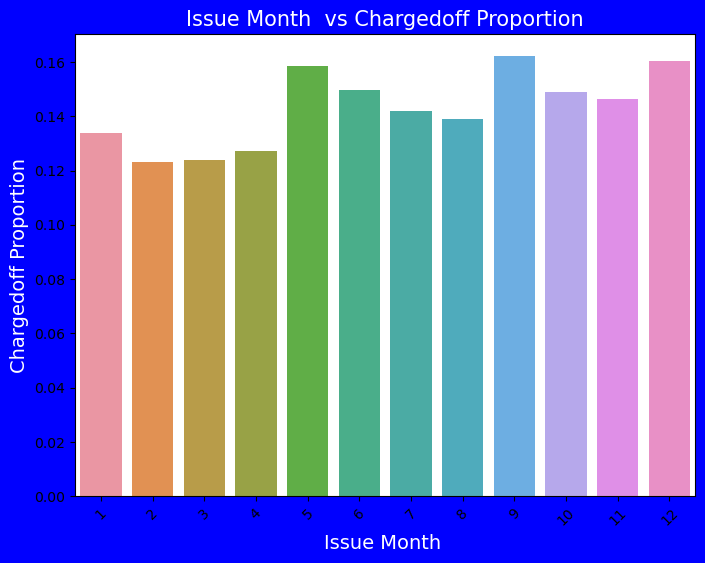

In [181]:
# graph
fig, ax1 = plot.subplots(figsize=(8, 6),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [182]:
# Address state Vs Chargedoff -
addr_state_vs_loan = loan_df1.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
40,TN,2.0,7.0,9.0,0.222222
31,NV,92.0,326.0,418.0,0.220096
39,SD,11.0,47.0,58.0,0.189655
11,HI,27.0,118.0,145.0,0.186207
0,AK,12.0,53.0,65.0,0.184615
30,NM,30.0,134.0,164.0,0.182927
9,FL,431.0,2021.0,2452.0,0.175775
23,MO,104.0,497.0,601.0,0.173045
45,WA,113.0,591.0,704.0,0.160511
4,CA,956.0,5013.0,5969.0,0.160161


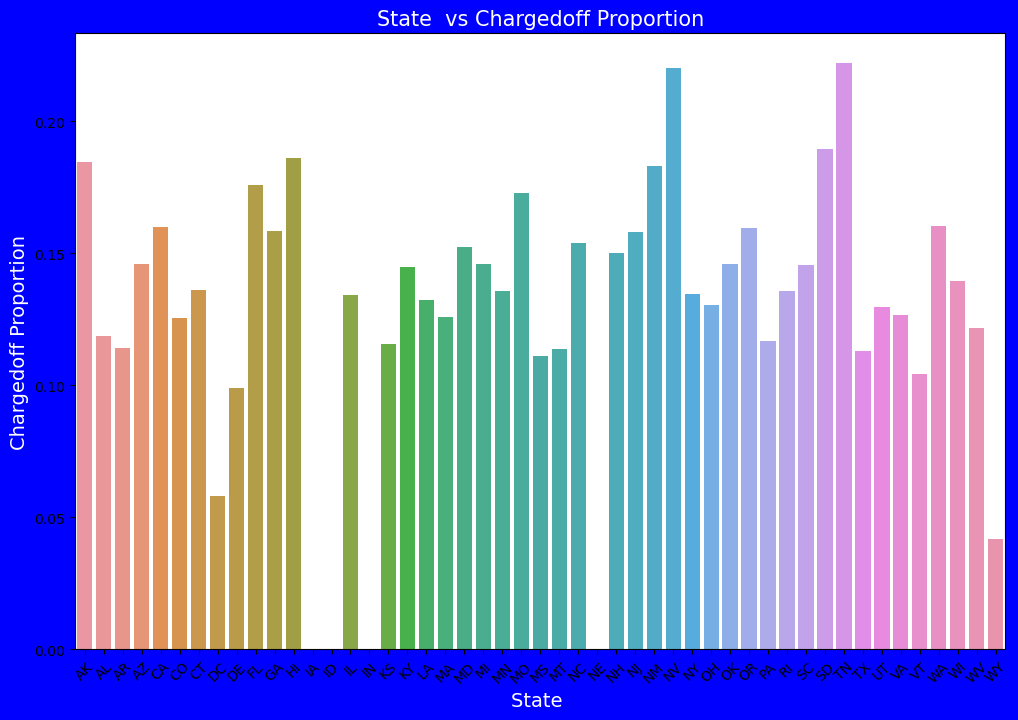

In [187]:
# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [188]:
#Grade VS Chargedoff_Proportion -
grade_vs_loan = loan_df1.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,52,93,145,0.358621
5,F,211,453,664,0.317771
4,E,558,1479,2037,0.273932
3,D,947,3301,4248,0.222928
2,C,1207,5657,6864,0.175845
1,B,1279,8905,10184,0.125589
0,A,573,8636,9209,0.062222


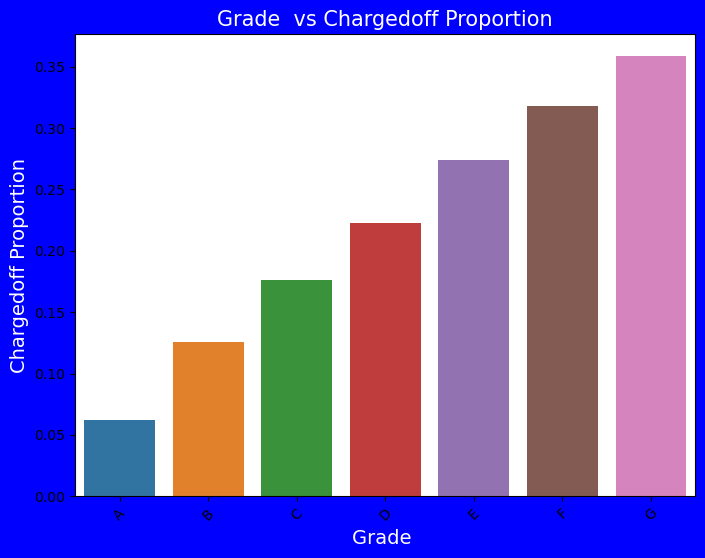

In [190]:
# graph
fig, ax1 = plot.subplots(figsize=(8,6),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=se.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()